In [33]:
from selenium import webdriver
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# For Karachi

In [2]:
def extractMonth(m, y):
    url='https://www.timeanddate.com/weather/pakistan/karachi/historic?'
    urlf=url+'month='+str(m)+'&year=' + str(y)
    path = 'C:\\Users\\CS\\Documents\\EGDownloads\\chromedriver_win32\\chromedriver.exe'
    driver = webdriver.Chrome(executable_path = path)
    driver.get(urlf)
    cont = driver.find_element_by_id('weatherContainer')
    a=cont.get_attribute('innerHTML')

    soup = BeautifulSoup(a, 'html.parser')

    low = [d.text.split(":")[-1] for d in soup.find_all('div',class_= "tempLow low")]

    high = [d.text.split(":")[-1] for d in soup.find_all('div',class_= "temp low")]

    time = [d.text for d in soup.find_all('div',class_= "time")]
    driver.quit()
    res = []
    for i, data in enumerate(zip(time, low, high)):
        res.append((y, m, i//4 + 1, *data))
    return res 

In [3]:
def extractYear(j):
    months = []
    for i in range(1,13):
        months.append((extractMonth(i,j)))    
    return months

In [4]:
def extractAll():
    years=[]
    for j in range(2010,2020):
        years.append(extractYear(j))
    return years

In [5]:
allYears = extractAll() 

In [6]:
allYears

[[[(2010, 1, 1, '00:00', '13', '15'),
   (2010, 1, 1, '06:00', '14', '26'),
   (2010, 1, 1, '12:00', '26', '28'),
   (2010, 1, 1, '18:00', '20', '26'),
   (2010, 1, 2, '00:00', '19', '20'),
   (2010, 1, 2, '06:00', '19', '23'),
   (2010, 1, 2, '12:00', '23', '25'),
   (2010, 1, 2, '18:00', '19', '23'),
   (2010, 1, 3, '00:00', '13', '19'),
   (2010, 1, 3, '06:00', '12', '23'),
   (2010, 1, 3, '12:00', '23', '27'),
   (2010, 1, 3, '18:00', '16', '23'),
   (2010, 1, 4, '00:00', '12', '16'),
   (2010, 1, 4, '06:00', '11', '25'),
   (2010, 1, 4, '12:00', '23', '28'),
   (2010, 1, 4, '18:00', '17', '23'),
   (2010, 1, 5, '00:00', '13', '17'),
   (2010, 1, 5, '06:00', '13', '27'),
   (2010, 1, 5, '12:00', '25', '27'),
   (2010, 1, 5, '18:00', '20', '25'),
   (2010, 1, 6, '00:00', '14', '20'),
   (2010, 1, 6, '06:00', '14', '24'),
   (2010, 1, 6, '12:00', '24', '26'),
   (2010, 1, 6, '18:00', '16', '24'),
   (2010, 1, 7, '00:00', '13', '16'),
   (2010, 1, 7, '06:00', '13', '24'),
   (2010, 1,

In [7]:
import csv

with open('WDataAll.csv', 'w',newline='') as file:
    writer = csv.writer(file)
     for y in allYears:
        for r in y:
            writer.writerows(r)

In [2]:
import pandas as pd
df=pd.read_csv("WDataAll.csv", names = ["Year", "Month", "Day", "Time", "Low", "High"]) 

In [3]:
df.shape

(14081, 6)

In [17]:
df.shape

(14081, 6)

In [18]:
df.head()

,Year,Month,Day,Time,Low,High
0,2010,1,1,00:00,13,15
1,2010,1,1,06:00,14,26
2,2010,1,1,12:00,26,28
3,2010,1,1,18:00,20,26
4,2010,1,2,00:00,19,20


In [19]:
df.tail()

,Year,Month,Day,Time,Low,High
14076,2019,12,4,00:00,17,19
14077,2019,12,4,06:00,19,28
14078,2019,12,4,12:00,26,30
14079,2019,12,4,18:00,22,26
14080,2019,12,5,00:00,20,22


In [20]:
df.describe()

,Year,Month,Day,Low,High
count,14081.000000,14081.000000,14081.000000,14081.000000,14081.000000
mean,2014.413962,6.573965,15.541510,24.843477,29.006747
std,2.861728,3.399106,8.804707,5.959803,5.112126
min,2010.000000,1.000000,1.000000,0.000000,8.000000
25%,2012.000000,4.000000,8.000000,21.000000,26.000000
50%,2014.000000,7.000000,15.000000,27.000000,30.000000
75%,2017.000000,10.000000,23.000000,29.000000,33.000000
max,2019.000000,12.000000,31.000000,41.000000,47.000000


In [21]:
low=df.Low.min()

In [22]:
df[df['Low']==low]   

,Year,Month,Day,Time,Low,High
2952,2012,1,17,06:00,0,23


In [23]:
high=df.Low.max()

In [24]:
df[df['Low']==high]  

,Year,Month,Day,Time,Low,High
11826,2018,5,20,12:00,41,43


In [25]:
high=df.High.min()
df[df['High']==high]  

,Year,Month,Day,Time,Low,High
5802,2014,1,1,00:00,7,8


In [26]:
high=df.High.max()
df[df['High']==high]  

,Year,Month,Day,Time,Low,High
10423,2017,6,3,12:00,34,47


In [27]:
list=[]
j=0
for i in range(2010,2020):
    list.append(df[df.Year==i]['Low'].mean())
max(list) 
for i in range(len(list)):
    if list[i]==max(list):
        a=i
print('The higest Averge Temperture in year','201'+str(a),'',max(list))        

The higest Averge Temperture in year 2017  25.742653606411398


In [28]:
df.groupby("Year").min()

,Month,Day,Time,Low,High
Year,,,,,
2010,1,1,00:00,2,10
2011,1,1,00:00,2,10
2012,1,1,00:00,0,10
2013,1,1,00:00,3,10
2014,1,1,00:00,7,8
2015,1,1,00:00,8,12
2016,1,1,00:00,5,15
2017,1,1,00:00,9,11
2018,1,1,00:00,1,13


In [29]:
df.groupby("Year").max()

,Month,Day,Time,Low,High
Year,,,,,
2010,12,31,18:00,38,42
2011,12,31,18:00,37,44
2012,12,31,18:00,40,42
2013,12,31,18:00,38,42
2014,12,31,18:00,38,42
2015,12,31,18:00,39,44
2016,12,31,18:00,38,40
2017,12,31,18:00,38,47
2018,12,31,18:00,41,45


In [30]:
df.groupby("Year").count()

,Month,Day,Time,Low,High
Year,,,,,
2010,1427,1427,1427,1427,1427
2011,1460,1460,1460,1460,1460
2012,1457,1457,1457,1457,1457
2013,1458,1458,1458,1458,1458
2014,1456,1456,1456,1456,1456
2015,1459,1459,1459,1459,1459
2016,1428,1428,1428,1428,1428
2017,1123,1123,1123,1123,1123
2018,1460,1460,1460,1460,1460


In [31]:
df.groupby("Month").min()

,Year,Day,Time,Low,High
Month,,,,,
1,2010,1,00:00,0,8
2,2010,1,00:00,6,10
3,2010,1,00:00,12,15
4,2010,1,00:00,18,22
5,2010,1,00:00,20,27
6,2010,1,00:00,25,27
7,2010,1,00:00,24,26
8,2010,1,00:00,24,25
9,2010,1,00:00,20,25


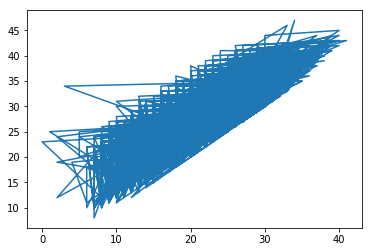

In [34]:
low = df["Low"].tolist()
high = df["High"].tolist()

plt.plot(low,high)
plt.show()

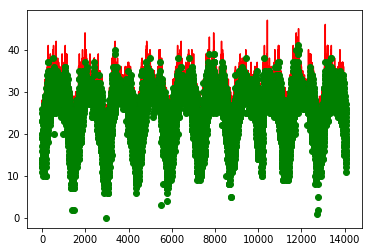

In [35]:
low = df["Low"].tolist()
high = df["High"].tolist()
plt.plot(high,'red')
plt.plot(low,'go')

plt.show()

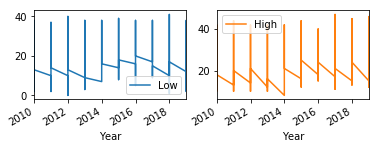

In [192]:
df.plot(y=['Low','High'], x='Year', subplots=True, layout=(2,2))
plt.show()

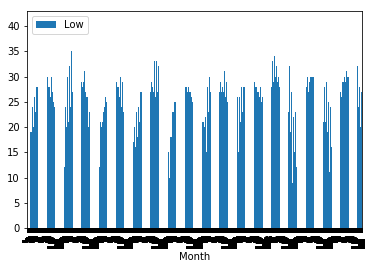

In [188]:
df.plot.bar(y=['Low'], x='Month')

# For Lahore

In [ ]:
def extractMonth(m, y):
    url='https://www.timeanddate.com/weather/pakistan/lahore/historic?'
    urlf=url+'month='+str(m)+'&year=' + str(y)
    path = 'C:\\Users\\CS\\Documents\\EGDownloads\\chromedriver_win32\\chromedriver.exe'
    driver = webdriver.Chrome(executable_path = path)
    driver.get(urlf)
    cont = driver.find_element_by_id('weatherContainer')
    a=cont.get_attribute('innerHTML')

    soup = BeautifulSoup(a, 'html.parser')

    low = [d.text.split(":")[-1] for d in soup.find_all('div',class_= "tempLow low")]

    high = [d.text.split(":")[-1] for d in soup.find_all('div',class_= "temp low")]

    time = [d.text for d in soup.find_all('div',class_= "time")]
    driver.quit()
    res = []
    for i, data in enumerate(zip(time, low, high)):
        res.append((y, m, i//4 + 1, *data))
    return res 

In [ ]:
def extractYear(j):
    months = []
    for i in range(1,13):
        months.append((extractMonth(i,j)))    
    return months

In [ ]:
def extractAll():
    years=[]
    for j in range(2010,2020):
        years.append(extractYear(j))
    return years

In [ ]:
allYears = extractAll() 

In [ ]:
allYears

In [ ]:
import csv
with open('LahoreWData.csv', 'w',newline='') as file:
    writer = csv.writer(file)
    for y in allYears:
        for r in y:
            writer.writerows(r)

In [81]:
import pandas as pd
dfLahore=pd.read_csv("LahoreWData.csv", names = ["Year", "Month", "Day", "Time", "Low", "High"])

In [82]:
dfLahore

,Year,Month,Day,Time,Low,High
0,2010,1,1,00:00,4,6
1,2010,1,1,06:00,3,21
2,2010,1,1,12:00,14,22
3,2010,1,1,18:00,6,13
4,2010,1,2,00:00,3,6
5,2010,1,2,06:00,2,12
6,2010,1,2,12:00,10,15
7,2010,1,2,18:00,9,10
8,2010,1,3,00:00,9,9
9,2010,1,3,06:00,9,16


In [45]:
list=[]
j=0
for i in range(2010,2020):
    list.append(dfLahore[dfLahore.Year==i]['Low'].mean())
max(list) 
for i in range(len(list)):
    if list[i]==max(list):
        a=i
print('The higest Averge Temperture in year','201'+str(a),'',max(list))        




The higest Averge Temperture in year 2010  23.10791871058164


In [46]:
dfLahore.groupby("Year").min()

,Month,Day,Time,Low,High
Year,,,,,
2010,1,1,00:00,2,5
2011,1,1,00:00,1,6
2012,1,1,00:00,0,5
2013,1,1,00:00,1,3
2014,1,1,00:00,1,5
2015,1,1,00:00,3,7
2016,1,1,00:00,4,7
2017,1,1,00:00,0,6
2018,1,1,00:00,3,6


In [47]:
dfLahore.groupby("Year").max()

,Month,Day,Time,Low,High
Year,,,,,
2010,12,31,18:00,45,47
2011,12,31,18:00,44,46
2012,12,31,18:00,44,46
2013,12,31,18:00,46,47
2014,12,31,18:00,44,46
2015,12,31,18:00,41,44
2016,12,31,18:00,44,46
2017,12,31,18:00,43,46
2018,12,31,18:00,43,44


In [48]:
dfLahore.groupby("Year").count()

,Month,Day,Time,Low,High
Year,,,,,
2010,1427,1427,1427,1427,1427
2011,1450,1450,1450,1450,1450
2012,1458,1458,1458,1458,1458
2013,1458,1458,1458,1458,1458
2014,1450,1450,1450,1450,1450
2015,1459,1459,1459,1459,1459
2016,1459,1459,1459,1459,1459
2017,1459,1459,1459,1459,1459
2018,1460,1460,1460,1460,1460


In [49]:
dfLahore.groupby("Month").min()

,Year,Day,Time,Low,High
Month,,,,,
1,2010,1,00:00,1,3
2,2010,1,00:00,2,7
3,2010,1,00:00,8,10
4,2010,1,00:00,15,16
5,2010,1,00:00,16,17
6,2010,1,00:00,19,22
7,2010,1,00:00,20,23
8,2010,1,00:00,20,23
9,2010,1,00:00,2,20


In [50]:
high=dfLahore.High.max()
dfLahore[dfLahore['High']==high]

,Year,Month,Day,Time,Low,High
556,2010,5,26,12:00,45,47
4905,2013,5,23,12:00,46,47
4909,2013,5,24,12:00,44,47


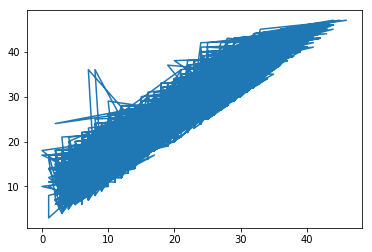

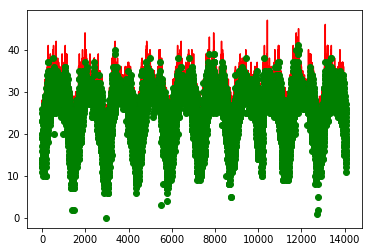

In [51]:
low = dfLahore["Low"].tolist()
high = dfLahore["High"].tolist()

plt.plot(low,high)
plt.show()

low = df["Low"].tolist()
high = df["High"].tolist()
plt.plot(high,'red')
plt.plot(low,'go')

plt.show()






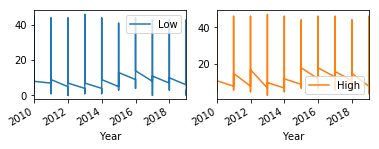

In [52]:
dfLahore.plot(y=['Low','High'], x='Year', subplots=True, layout=(2,2))
plt.show()

In [67]:
# dfLahore.plot.bar(y=['Low'], x='Month')
dfLahore

,Year,Low,Key
0,2010,NaN,Lahore
1,2010,NaN,Lahore
2,2010,NaN,Lahore
3,2010,NaN,Lahore
4,2010,NaN,Lahore
5,2010,NaN,Lahore
6,2010,NaN,Lahore
7,2010,NaN,Lahore
8,2010,NaN,Lahore
9,2010,NaN,Lahore


# Comparsion Of Karachi And Lahore Low Temp

In [85]:
dfLahore

,Year,Month,Day,Time,Low,High
0,2010,1,1,00:00,4,6
1,2010,1,1,06:00,3,21
2,2010,1,1,12:00,14,22
3,2010,1,1,18:00,6,13
4,2010,1,2,00:00,3,6
5,2010,1,2,06:00,2,12
6,2010,1,2,12:00,10,15
7,2010,1,2,18:00,9,10
8,2010,1,3,00:00,9,9
9,2010,1,3,06:00,9,16


In [95]:
# df = pd.DataFrame(df, columns=['Year', 'Low'])
# dfLahore = pd.DataFrame(dfLahore, columns=['Year', 'Low'])

# df['Key'] = 'Karachi'
# dfLahore['Key'] = 'Lahore'

# DF = pd.concat([df,dfLahore],keys=['Karachi','Lahore'])

# DFGroupn = DF.groupby(['Year','Key'])

# DFGPlotm = DFGroup.sum().unstack('Key').plot(kind='bar')

# For Low

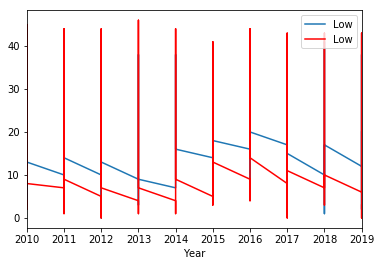

In [86]:
ax = plt.gca()

df.plot(kind='line',x='Year',y='Low',ax=ax)
dfLahore.plot(kind='line',x='Year',y='Low', color='red', ax=ax)

plt.show()

# For High

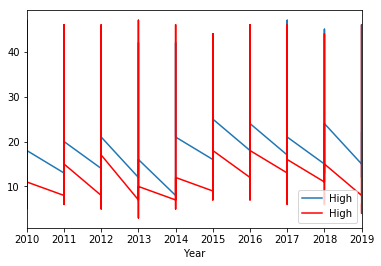

In [101]:
ax = plt.gca()

df.plot(kind='line',x='Year',y='High',ax=ax)
dfLahore.plot(kind='line',x='Year',y='High', color='red', ax=ax)

plt.show()

In [97]:
import seaborn as seabornInstance

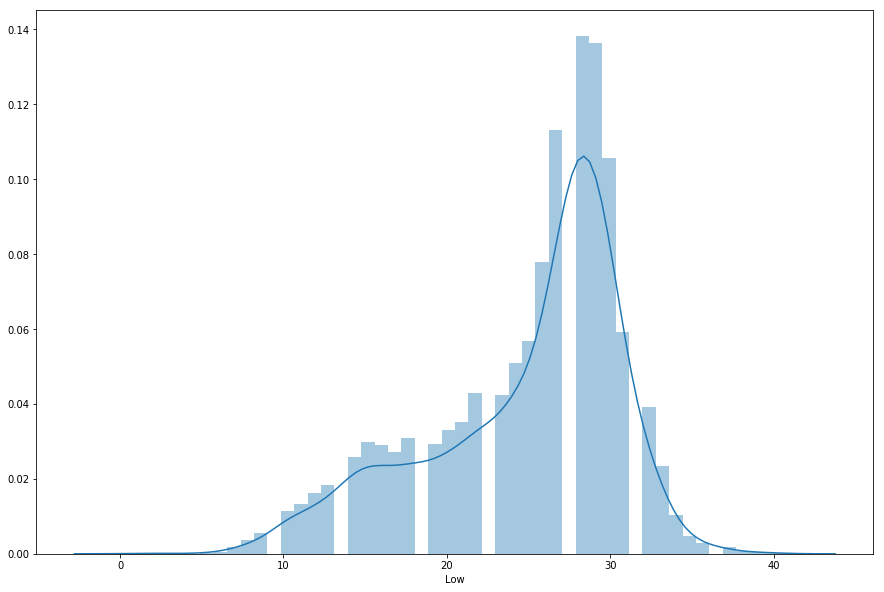

In [98]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Low'])

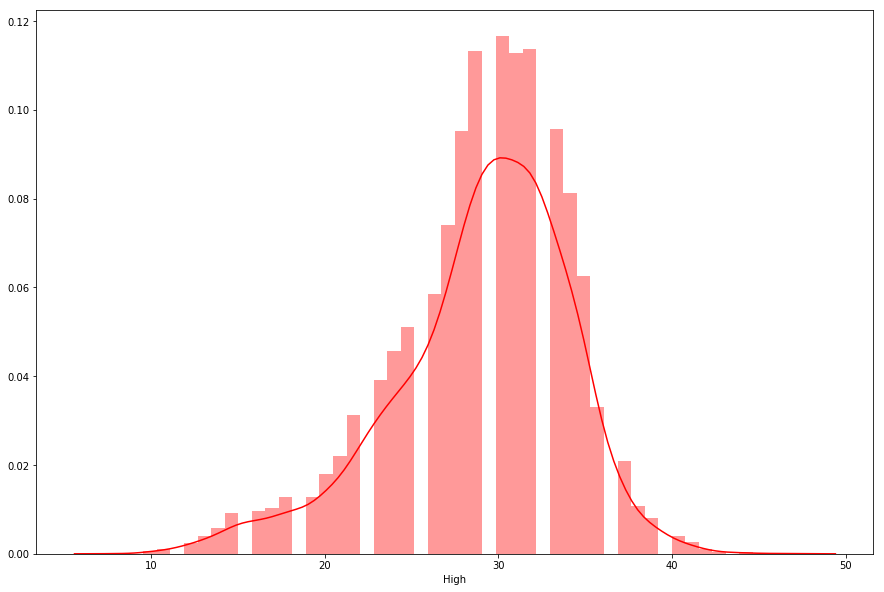

In [102]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['High'],color='red')

# Karachi Low Graph

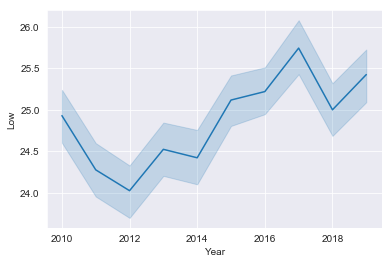

In [119]:
ax = seabornInstance.lineplot(x="Year", y="Low",markers=True, dashes=False, data=df)

# Lahore Low Graph

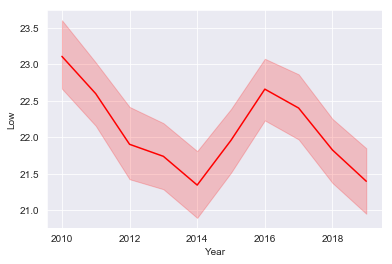

In [121]:
ax = seabornInstance.lineplot(x="Year", y="Low",color='red',markers=True, dashes=False, data=dfLahore)

# Karachi High Graph

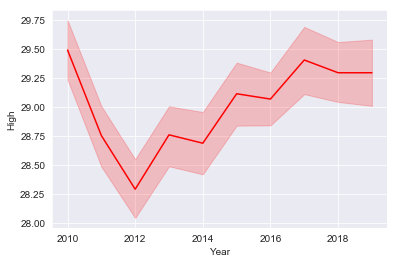

In [123]:
ax = seabornInstance.lineplot(x="Year", y="High",color='red',markers=True, dashes=False, data=df)

# Lahore High Graph

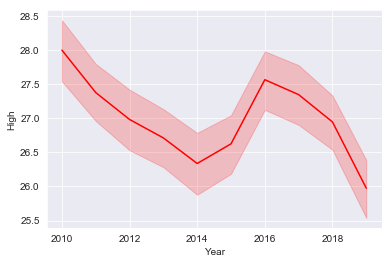

In [124]:
ax = seabornInstance.lineplot(x="Year", y="High",color='red',markers=True, dashes=False, data=dfLahore)

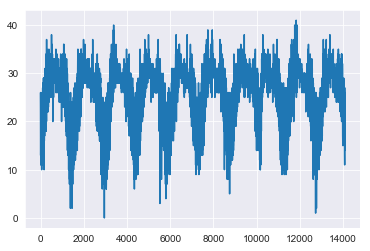

In [115]:
seabornInstance.set_style("darkgrid")
plt.plot(df['Low'])
plt.show()

In [134]:
concatenated = pd.concat([df.assign(dataset='Karachi'), dfLahore.assign(dataset='Lahore')])

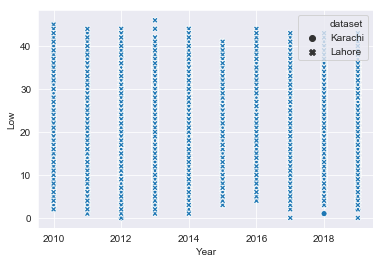

In [135]:
seabornInstance.scatterplot(x='Year', y='Low', data=concatenated,
                 style='dataset')
plt.show()